In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import requests
import time
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px




from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from datetime import datetime


# Web crawling


In [2]:
Prices  = []
Bed = []
Bath = []
Sqft = []
Property_Type = []
Subdivision = []

###################################################

Quiet = []              
Elementary_schools = []
Parks = []
Car_friendly = []
Grocery_stores = []
Pedestrian_friendly = []
Coffee_Shops = []
Transit_friendly = []
Daycares = []
Restaurants = []
Cycling_friendly = []
Vibrancy = []
Shopping = []
High_schools = []
Nightlife = []

###################################################

table_list = {
     "Quiet":Quiet,
     "Elementary schools":Elementary_schools,
     "Parks":Parks,
     "Car friendly":Car_friendly,
     "Grocery stores":Grocery_stores,
     "Pedestrian friendly":Pedestrian_friendly,
     "Coffee Shops":Coffee_Shops,
     "Transit friendly":Transit_friendly,
     "Daycares":Daycares,
     "Restaurants":Restaurants,
     "Cycling friendly":Cycling_friendly,
     "Vibrancy":Vibrancy,
     "Shopping":Shopping,
     "High schools":High_schools,
     "Nightlife":Nightlife
}

###################################################

In [3]:
import telebot
last_page = 161

API_KEY = '7413781457:gHWUBPAvH5J67vI_1nVlCjVw214aqtswzw'
bot = telebot.TeleBot(API_KEY ,threaded=False)

In [4]:
ERROR = []
okLinks = []

def OkDef(link):
    okLinks.append(link)
    
def errorDef(link):
    ERROR.append(link)

In [5]:
def teleSender(link, error,page,apratment):
    current_house = len(okLinks)+len(ERROR)
    percent = (current_house/(last_page*20))*100
    p = "{:.2f}".format(percent)
    
    try:
        bot.send_message('@CaNadlanHIT', str(p)+"% | " + str(len(okLinks)) + " | (" + str(page) + "," + str(apratment+1) + ")" )
        if (error==1): bot.send_message('@CaNadlanHIT', str(link))
    except:
        try:
            bot.send_message(615374265, "שגיאה בשליחה | " + str(current_house) + " | (" + str(page) + "," + str(apratment+1) + ")")
        except: pass
        
#souce : https://pytba.readthedocs.io/en/latest/index.html        

In [6]:
def is_equal():
    n = len(Prices)
    if n == len(Bed) == len(Bath) == len(Sqft) == len(Property_Type) == len(Subdivision):
        for item in table_list:
            if n != len(table_list[item]):
                return False
            
        return True
    
    else:
        return False    

In [7]:
start = time.monotonic()
driver = webdriver.Chrome('D:\chromedriver_win32\chromedriver.exe')
ends_each_link = "-lst"

left_time = 80.14 
min_time = (left_time*(last_page-1))/(60)
min_time_dec = "{:.2f}".format(min_time)
bot.send_message('@CaNadlanHIT', "מתחילים!" + "\n" + "הכל יהיה מוכן בעוד " + str(min_time_dec) + " דקות.") 
    
for pages in range(1,last_page):
    url = f'https://www.remax.ca/bc/vancouver-real-estate?pageNumber={pages}'

    apratment = 0 
    
    r = requests.get(url)
    soup  = BeautifulSoup(r.content,"html.parser")
    
    links = []
    for l in soup.find_all('a'):
        if ends_each_link in l.get('href'):
            links.append(l.get('href'))


    for l in links:
        driver.get(l)
        
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(2) #sleep_between_interactions

        soup_page = BeautifulSoup(driver.page_source)        
        
        try: 
            price =  soup_page.find( "div", {"class":"listing-summary_listPrice__PJawt"}).text.replace(",","")[1:]

            details = soup_page.find_all("span",{"class":"property-details_detailSpan__E4NRz listing-summary_propertyDetail__Xexeh"})
            bed = details[0].text.strip().replace("bed",'')
            bath = details[1].text.strip().replace("bath",'')
            sqrt = details[2].text.strip().replace("sqft",'').replace(",",'').strip()


            features_house = soup_page.find_all("li",{"class":"bullet-section_bulletPointRow__4pBp6"})
            for item in features_house:
                if "Property Type" in item.text:
                    property_Type = item.text.split("Property Type: ")[1]
                if "Subdivision" in item.text:
                    subdivision = item.text.split("Subdivision: ")[1]

            soup_page = BeautifulSoup(driver.page_source)
            table_vicinity = soup_page.find( "div", {"data-module":"Scores"})
            split_table = [c for c in re.split(r'([-+]?\d*\.\d+|\d+)', table_vicinity.text) if c]


            size = len(split_table)
            if size == 30:
                for index in range(0,size,2):
                    table_list[split_table[index]].append(split_table[index+1])


                Prices.append(price)
                Bed.append(bed)
                Bath.append(bath)
                Sqft.append(sqrt)
                Property_Type.append(property_Type)
                Subdivision.append(subdivision)
                OkDef(l) 
                teleSender(l,0,pages,apratment)
                apratment += 1
            else:
                errorDef(l) 
                teleSender(l,1,pages,apratment) 
                apratment += 1 
                          
            
        except: 
            apratment += 1 
            errorDef(l) 
            teleSender(l,1,pages,apratment) 

                      
driver.close()
end = time.monotonic()
sec = end-start
sec_dec = "{:.2f}".format(sec)
if is_equal(): bot.send_message('@CaNadlanHIT', "סיימתי, הכל עבר בהצלחה!" + "\n לאחר: " + str(sec_dec) + " שניות.")

print("Elapsed: " + sec_dec)





Elapsed: 12330.98


In [10]:
df = pd.DataFrame({"Price":Prices,
                   "Bed":Bed ,
                   "Bath": Bath,
                   "Sqft": Sqft ,
                   'Property Type': Property_Type,
                   "Subdivision": Subdivision,
                   "Quiet":Quiet ,
                   "Elementary schools": Elementary_schools,
                   "Parks": Parks ,
                   'Car friendly': Car_friendly,
                   "Grocery stores": Grocery_stores,
                   "Pedestrian friendly":Pedestrian_friendly ,
                   "Coffee Shops": Coffee_Shops,
                   "Transit friendly": Transit_friendly ,
                   'Daycares': Daycares,
                   "Restaurants": Restaurants,
                   "Cycling friendly":Cycling_friendly,
                   "Vibrancy": Vibrancy,
                   "Shopping": Shopping ,
                   'High schools': High_schools,
                   "Nightlife": Nightlife                  
                  })

In [77]:
file_path = 'D:/מדעי הנתונים - ניר וימית/CaNadlan-NEW.csv'

df.to_csv(file_path, index_label='#')

bot.send_document("@CaNadlanHIT", open(file_path, 'rb'))

In [4]:
df

,#,Price,Bed,Bath,Sqft,Property Type,Subdivision,Quiet,Elementary schools,Parks,...,Pedestrian friendly,Coffee Shops,Transit friendly,Daycares,Restaurants,Cycling friendly,Vibrancy,Shopping,High schools,Nightlife
0,0,639900.0,1,1,614,Condo,Hastings,4,8,7,...,10,7,9,8,8,7,5,8,8,5
1,1,7870000.0,4,5,3788,Condo/Townhome,Coal Harbour,8,8,8,...,10,9,10,10,9,5,7,10,8,7
2,2,2138000.0,4,3,1732,Single Family,Central Lonsdale,9,10,10,...,6,4,5,10,6,6,3,4,8,2
3,3,975000.0,2,2,881,Condo,Downtown VW,5,9,8,...,10,10,10,8,10,8,9,10,10,10
4,4,1799999.0,2,2,1640,Condo,False Creek,4,8,8,...,10,9,9,9,9,8,8,10,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,3187,565000.0,1,1,626,Condo,Collingwood VE,4,9,8,...,10,6,8,8,7,8,5,7,8,4
3188,3188,795000.0,2,1,1363,Condo,Collingwood VE,6,9,10,...,10,7,8,9,9,9,6,9,5,5
3189,3189,1599000.0,N/A,0,Land,Vacant Land,Collingwood VE,9,6,9,...,5,5,7,9,5,4,2,6,1,1
3190,3190,469900.0,1,1,519,Condo,Collingwood VE,2,8,10,...,10,9,10,7,9,8,8,10,8,8


# Pre-processing

### Droping duplicates values

In [5]:
df.drop_duplicates()
df

,#,Price,Bed,Bath,Sqft,Property Type,Subdivision,Quiet,Elementary schools,Parks,...,Pedestrian friendly,Coffee Shops,Transit friendly,Daycares,Restaurants,Cycling friendly,Vibrancy,Shopping,High schools,Nightlife
0,0,639900.0,1,1,614,Condo,Hastings,4,8,7,...,10,7,9,8,8,7,5,8,8,5
1,1,7870000.0,4,5,3788,Condo/Townhome,Coal Harbour,8,8,8,...,10,9,10,10,9,5,7,10,8,7
2,2,2138000.0,4,3,1732,Single Family,Central Lonsdale,9,10,10,...,6,4,5,10,6,6,3,4,8,2
3,3,975000.0,2,2,881,Condo,Downtown VW,5,9,8,...,10,10,10,8,10,8,9,10,10,10
4,4,1799999.0,2,2,1640,Condo,False Creek,4,8,8,...,10,9,9,9,9,8,8,10,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,3187,565000.0,1,1,626,Condo,Collingwood VE,4,9,8,...,10,6,8,8,7,8,5,7,8,4
3188,3188,795000.0,2,1,1363,Condo,Collingwood VE,6,9,10,...,10,7,8,9,9,9,6,9,5,5
3189,3189,1599000.0,N/A,0,Land,Vacant Land,Collingwood VE,9,6,9,...,5,5,7,9,5,4,2,6,1,1
3190,3190,469900.0,1,1,519,Condo,Collingwood VE,2,8,10,...,10,9,10,7,9,8,8,10,8,8


### Droping na value

In [6]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3190 entries, 0 to 3191
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    3190 non-null   int64  
 1   Price                3190 non-null   float64
 2   Bed                  3190 non-null   object 
 3   Bath                 3190 non-null   int64  
 4   Sqft                 3190 non-null   object 
 5   Property Type        3190 non-null   object 
 6   Subdivision          3190 non-null   object 
 7   Quiet                3190 non-null   int64  
 8   Elementary schools   3190 non-null   int64  
 9   Parks                3190 non-null   int64  
 10  Car friendly         3190 non-null   int64  
 11  Grocery stores       3190 non-null   int64  
 12  Pedestrian friendly  3190 non-null   int64  
 13  Coffee Shops         3190 non-null   int64  
 14  Transit friendly     3190 non-null   int64  
 15  Daycares             3190 non-null   i

### droping the uninteresting rows

In [7]:
for col in df.columns[1:]:
    df.drop(df[df[col] == "N/A "].index, inplace=True)

df.drop(df[df.Sqft == "Land"].index, inplace=True)
df.drop(df[df.Sqft == "House"].index, inplace=True)
df.drop(df[df.Sqft == "Duplex"].index, inplace=True)

df.drop(df[df.Bed == 0].index, inplace=True)
df.drop(df[df.Bath == 0].index, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3191
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   #                    3019 non-null   int64  
 1   Price                3019 non-null   float64
 2   Bed                  3019 non-null   object 
 3   Bath                 3019 non-null   int64  
 4   Sqft                 3019 non-null   object 
 5   Property Type        3019 non-null   object 
 6   Subdivision          3019 non-null   object 
 7   Quiet                3019 non-null   int64  
 8   Elementary schools   3019 non-null   int64  
 9   Parks                3019 non-null   int64  
 10  Car friendly         3019 non-null   int64  
 11  Grocery stores       3019 non-null   int64  
 12  Pedestrian friendly  3019 non-null   int64  
 13  Coffee Shops         3019 non-null   int64  
 14  Transit friendly     3019 non-null   int64  
 15  Daycares             3019 non-null   i

### changing the column types

In [8]:
dtypes = {'Bed': int, 'Sqft': float}
df = df.astype(dtypes)
          
df["Property Type"] = df["Property Type"].astype('category')
df["Subdivision"] = df["Subdivision"].astype('category')
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3191
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   #                    3019 non-null   int64   
 1   Price                3019 non-null   float64 
 2   Bed                  3019 non-null   int32   
 3   Bath                 3019 non-null   int64   
 4   Sqft                 3019 non-null   float64 
 5   Property Type        3019 non-null   category
 6   Subdivision          3019 non-null   category
 7   Quiet                3019 non-null   int64   
 8   Elementary schools   3019 non-null   int64   
 9   Parks                3019 non-null   int64   
 10  Car friendly         3019 non-null   int64   
 11  Grocery stores       3019 non-null   int64   
 12  Pedestrian friendly  3019 non-null   int64   
 13  Coffee Shops         3019 non-null   int64   
 14  Transit friendly     3019 non-null   int64   
 15  Daycares             

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3019 entries, 0 to 3191
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   #                    3019 non-null   int64   
 1   Price                3019 non-null   float64 
 2   Bed                  3019 non-null   int32   
 3   Bath                 3019 non-null   int64   
 4   Sqft                 3019 non-null   float64 
 5   Property Type        3019 non-null   category
 6   Subdivision          3019 non-null   category
 7   Quiet                3019 non-null   int64   
 8   Elementary schools   3019 non-null   int64   
 9   Parks                3019 non-null   int64   
 10  Car friendly         3019 non-null   int64   
 11  Grocery stores       3019 non-null   int64   
 12  Pedestrian friendly  3019 non-null   int64   
 13  Coffee Shops         3019 non-null   int64   
 14  Transit friendly     3019 non-null   int64   
 15  Daycares             

### outliers

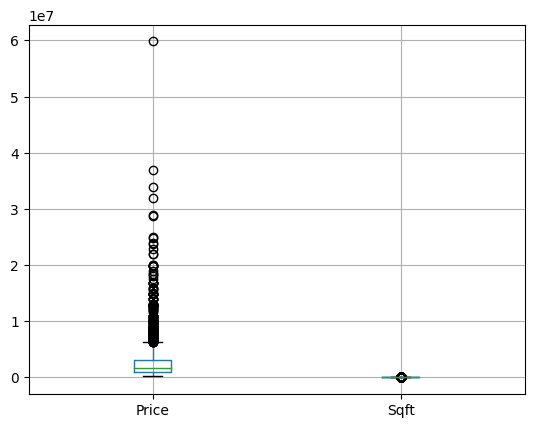

In [11]:
df[['Price', 'Sqft']].boxplot()
plt.show()

In [137]:
q1 = df['Price'].quantile(0.25)
q3 = df['Price'].quantile(0.75)

iqr = q3 - q1
outliers = df[(df['Price'] < (q1 - 1.5 * iqr)) | (df['Price'] > (q3 + 1.5 * iqr))]
outliers



,#,Price,Bed,Bath,Sqft,Property Type,Subdivision,Quiet,Elementary schools,Parks,...,Pedestrian friendly,Coffee Shops,Transit friendly,Daycares,Restaurants,Cycling friendly,Vibrancy,Shopping,High schools,Nightlife
1,1,7870000.0,4,5,3788.0,Condo/Townhome,Coal Harbour,8,8,8,...,10,9,10,10,9,5,7,10,8,7
63,63,9980000.0,7,8,5660.0,Single Family,South Granville,5,9,8,...,7,5,7,9,6,7,3,6,8,3
84,84,16880000.0,7,8,11159.0,Single Family,Chartwell,10,6,10,...,3,2,3,0,3,2,1,3,5,1
99,99,12280000.0,6,8,7345.0,Single Family,South Granville,10,8,8,...,6,5,6,10,6,6,3,6,6,2
162,162,9300000.0,3,4,3107.0,Condo,Yaletown,3,10,9,...,10,9,10,10,9,8,8,10,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,3127,8695000.0,5,3,3288.0,Single Family,Cambie,9,9,8,...,10,7,9,9,8,8,5,9,6,4
3133,3133,6800000.0,6,10,8305.0,Single Family,British Properties,9,2,10,...,3,2,3,1,3,2,1,4,1,1
3166,3166,16800000.0,7,8,10291.0,Single Family,British Properties,9,6,10,...,3,2,3,2,4,2,1,4,5,1
3185,3185,14880000.0,4,6,7217.0,Single Family,Collingwood VE,4,7,10,...,2,1,3,7,2,2,1,1,1,3


In [138]:
df =  df[(df['Price'] > (q1 - 1.5 * iqr)) & (df['Price'] < (q3 + 1.5 * iqr))]
df

,#,Price,Bed,Bath,Sqft,Property Type,Subdivision,Quiet,Elementary schools,Parks,...,Pedestrian friendly,Coffee Shops,Transit friendly,Daycares,Restaurants,Cycling friendly,Vibrancy,Shopping,High schools,Nightlife
0,0,639900.0,1,1,614.0,Condo,Hastings,4,8,7,...,10,7,9,8,8,7,5,8,8,5
2,2,2138000.0,4,3,1732.0,Single Family,Central Lonsdale,9,10,10,...,6,4,5,10,6,6,3,4,8,2
3,3,975000.0,2,2,881.0,Condo,Downtown VW,5,9,8,...,10,10,10,8,10,8,9,10,10,10
4,4,1799999.0,2,2,1640.0,Condo,False Creek,4,8,8,...,10,9,9,9,9,8,8,10,8,6
5,5,629800.0,2,2,1051.0,Condo,Renfrew VE,4,9,8,...,8,6,9,10,7,8,4,6,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3184,3184,599000.0,2,1,757.0,Condo,Collingwood VE,8,9,8,...,8,4,9,7,6,6,4,7,7,1
3187,3187,565000.0,1,1,626.0,Condo,Collingwood VE,4,9,8,...,10,6,8,8,7,8,5,7,8,4
3188,3188,795000.0,2,1,1363.0,Condo,Collingwood VE,6,9,10,...,10,7,8,9,9,9,6,9,5,5
3190,3190,469900.0,1,1,519.0,Condo,Collingwood VE,2,8,10,...,10,9,10,7,9,8,8,10,8,8


# EDA


## Statistical analysis

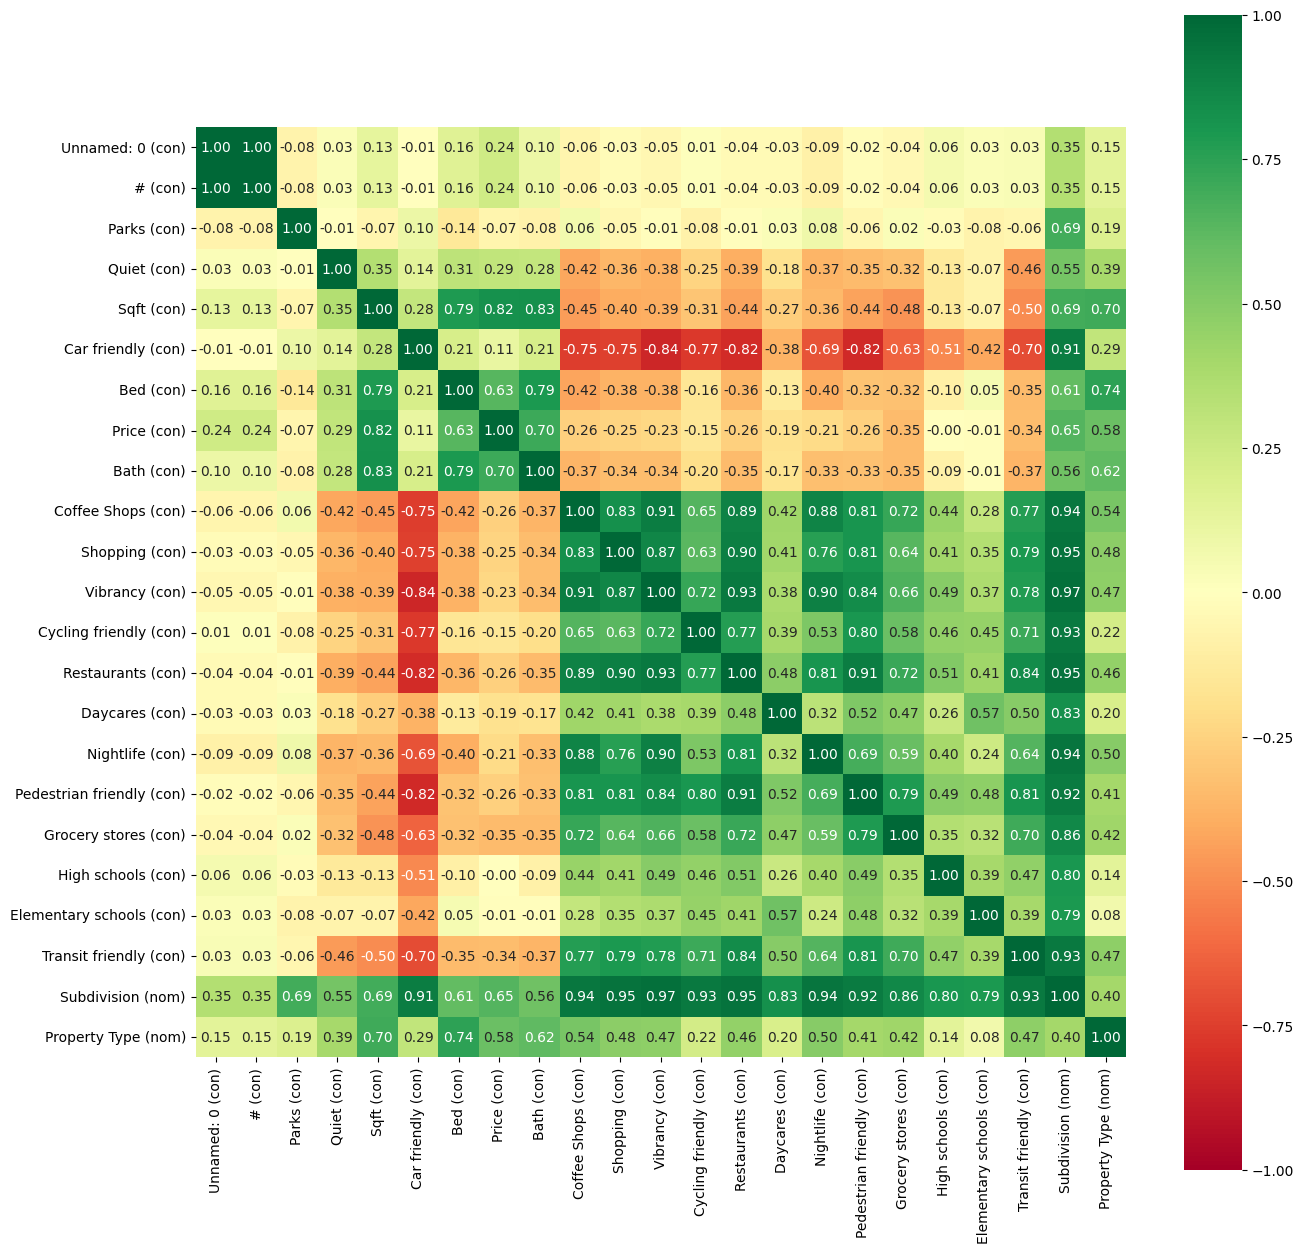

In [12]:
from scipy import stats
from dython.nominal import associations
ax = associations(df, figsize = (15, 15), cmap='RdYlGn', mark_columns = True, clustering=True)
plt.show()

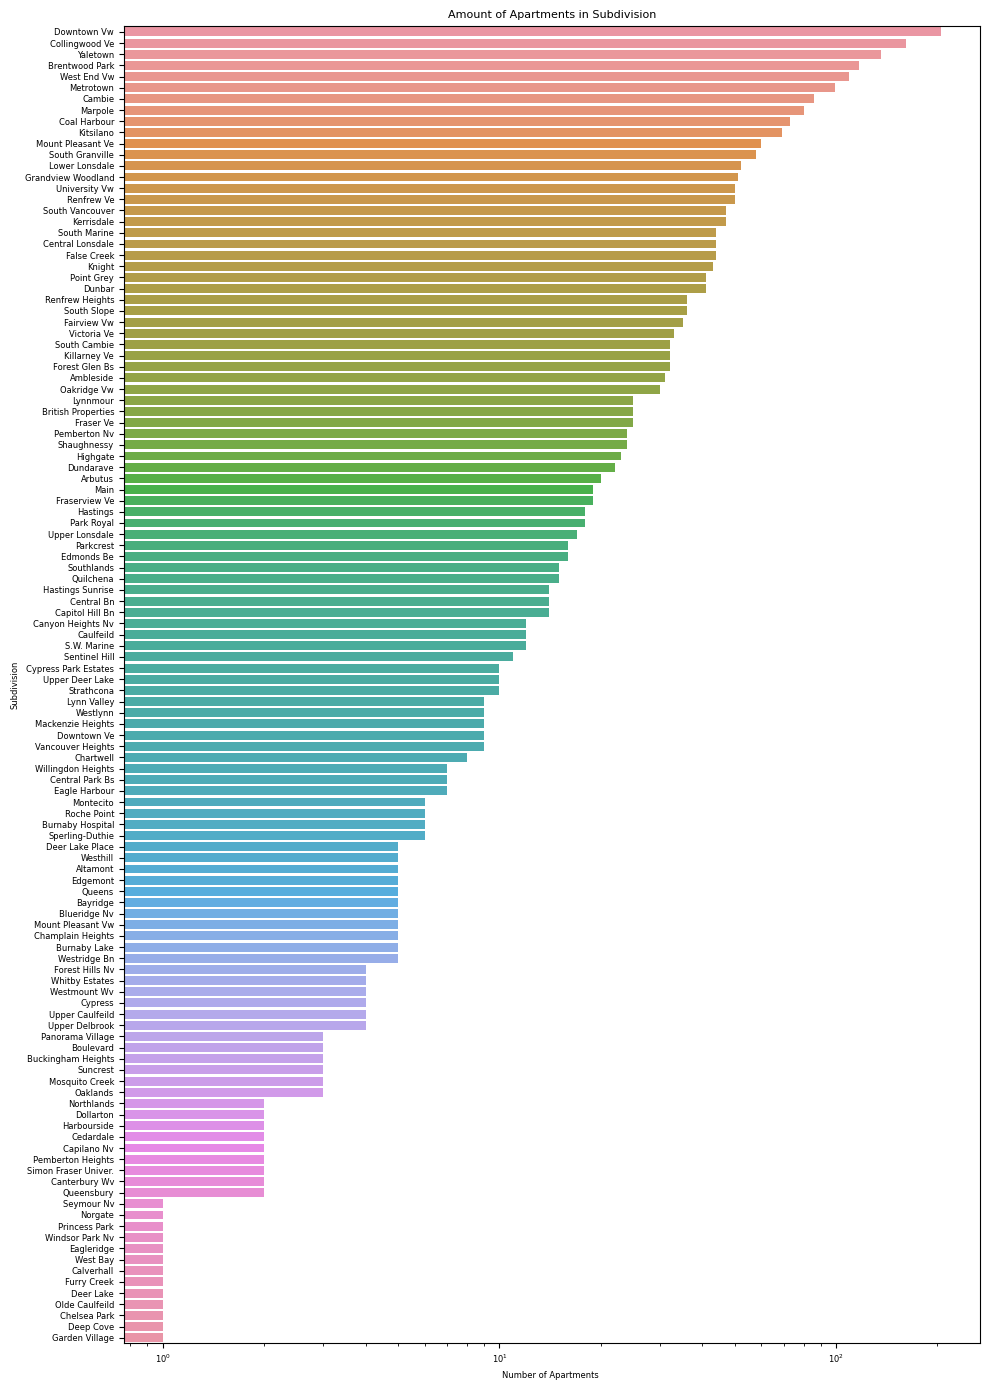

In [6]:
plt.figure(figsize=(10, 14))
countries = list(
    map(lambda x: x.title(), df["Subdivision"].value_counts().keys().tolist()))
ax = sns.countplot(y="Subdivision", data=df,
                order=df["Subdivision"].value_counts().index)
ax.set_xscale("log")
ax.axes.set_title("Amount of Apartments in Subdivision", fontsize=8)
ax.set_xlabel("Number of Apartments ", fontsize=6)
ax.set_ylabel("Subdivision", fontsize=6)
ax.tick_params(labelsize=6)
ax.set_yticklabels(countries, rotation=0, fontsize=6)
plt.tight_layout()
plt.show()

#source = https://seaborn.pydata.org/generated/seaborn.countplot.html


In [7]:
from collections import Counter
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
neighborhoods = list(dict(Counter(df.Subdivision).most_common(20)).keys())

avg_sale_prices = []
for i in neighborhoods:
    avg_price = np.mean(df.Price[df.Subdivision == i])
    avg_sale_prices.append(avg_price)
    
dataa = [go.Bar(
            y= neighborhoods,
            x = avg_sale_prices,
            width = 0.7,
            opacity=0.6, 
            orientation = 'h',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5,
                )
            ),
        )]
layout = go.Layout(
    title='Average House Price in the top 20 neighborhoods',
    autosize = True,
    margin=go.Margin(
        l=250,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    xaxis=dict(
        title='Sale Price',
    ),
    yaxis=dict(
        title='Subdivision',
    ),
)

fig = go.Figure(data=dataa, layout = layout)
py.iplot(fig, filename='barplottype')

#source : https://www.kaggle.com/code/m2skills/nyc-housing-interactive-plotly-charts-beginner

C:\Users\knir4\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:405: DeprecationWarning:

plotly.graph_objs.Margin is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Margin




In [8]:
# distribution of houses in each borough
Property_Type = df["Property Type"].unique()
property_count = []
for b in Property_Type:
    property_count.append(len(df["Property Type"][df["Property Type"] == b]))

fig = {
  "data": [
    {
      "values": property_count,
      "labels": Property_Type,
      "hoverinfo":"label+percent",
      "hole": .3,
      "type": "pie"
    }],
  "layout": {
        "title":"Percentage of Properties in Property Type",
    }
}
py.iplot(fig, filename='donut')


dataa = [go.Bar(
            y= Property_Type,
            x = property_count,
            width = 0.7,
            opacity=0.6, 
            orientation = 'h',
            marker=dict(
                color='rgb(158,202,225)',
                line=dict(
                    color='rgb(8,48,107)',
                    width=1.5,
                )
            ),
        )]
layout = go.Layout(
    title='Number of Housing Properties in each Property Type',
    autosize = False,
    width=800,
    height=500,
    margin=go.Margin(
        l=250,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
)

fig = go.Figure(data=dataa, layout = layout)
py.iplot(fig, filename='barplottype')


#source : https://www.kaggle.com/code/m2skills/nyc-housing-interactive-plotly-charts-beginner

# Machine learing


In [104]:
label = 'Price'
features = ["Quiet", "Bed","Bath","Sqft","Property Type","Subdivision"]

X = df[features]
y = df[label]

X.head()
y.head()

0     639900.0
1    2138000.0
2     975000.0
3    1799999.0
4     629800.0
Name: Price, dtype: float64

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("X_train:")
X_train.head()
print("y_train:")
y_train.head()

Initial amount of samples: #2790
Number of training samples: #2232
Number of test samples: #558
X_train:
y_train:


238      519000.0
1271    4990000.0
1448     588800.0
1718    3380000.0
100     2449000.0
Name: Price, dtype: float64

In [106]:
from sklearn.preprocessing import MinMaxScaler


# select numeric features:
X_train_numeric = X_train._get_numeric_data().copy()

X_numeric_cols = X_train_numeric.columns
X_test_numeric  = X_test[X_numeric_cols].copy()

X_numeric_cols

Index(['Quiet', 'Bed', 'Bath', 'Sqft'], dtype='object')

In [107]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_numeric_cols, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.fit_transform(X_test_numeric), columns=X_numeric_cols, index=X_test.index)
X_train_scaled.head()

,Quiet,Bed,Bath,Sqft
238,0.8,0.153846,0.000000,0.075100
1271,0.8,0.461538,0.090909,0.237816
1448,0.4,0.076923,0.000000,0.017612
1718,1.0,0.384615,0.363636,0.307931
100,0.5,0.538462,0.363636,0.359880


In [108]:
import category_encoders as ce


#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['Subdivision',"Property Type"],return_df=True)
#source : https://www.analyticsvidhya.com/blog/2020/08/types-of-categorical-data-encoding/

X_train_discrete_encoded=encoder.fit_transform(X_train) 
X_test_discrete_encoded=encoder.fit_transform(X_test) 
X_train_discrete_encoded =X_train_discrete_encoded.loc[X_train.index,:]
X_test_discrete_encoded =X_test_discrete_encoded.loc[X_test.index,:]

X_train_discrete_encoded

,Quiet,Bed,Bath,Sqft,Property Type_0,Property Type_1,Property Type_2,Subdivision_0,Subdivision_1,Subdivision_2,Subdivision_3,Subdivision_4,Subdivision_5,Subdivision_6
238,8,2,1,1059.0,0,0,1,0,0,0,0,0,0,1
1271,8,6,2,2528.0,0,1,0,0,0,0,0,0,1,0
1448,4,1,1,540.0,0,0,1,0,0,0,0,0,1,1
1718,10,5,5,3161.0,0,1,0,0,0,0,0,1,0,0
100,5,7,5,3630.0,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,6,6,4,1973.0,0,1,0,0,1,0,0,1,0,0
1095,7,3,2,1459.0,0,0,1,0,1,1,0,1,1,0
1130,9,4,2,2368.0,0,1,0,0,1,0,0,1,0,0
1294,9,4,3,3300.0,0,1,0,1,0,0,0,0,0,0


In [109]:
X_train_processed = pd.concat((X_train_scaled, X_train_discrete_encoded), axis=1)
X_test_processed = pd.concat((X_test_scaled, X_test_discrete_encoded), axis=1)

X_test_processed =X_test_processed.loc[:,~X_test_processed.columns.duplicated()].copy()
X_train_processed=X_train_processed.loc[:,~X_train_processed.columns.duplicated()].copy()
X_test_processed

,Quiet,Bed,Bath,Sqft,Property Type_0,Property Type_1,Property Type_2,Subdivision_0,Subdivision_1,Subdivision_2,Subdivision_3,Subdivision_4,Subdivision_5,Subdivision_6
2247,0.2,0.363636,0.272727,0.118079,0,0,1,0,0,0,0,0,0,1
1518,0.6,0.181818,0.181818,0.102678,0,1,0,0,0,0,0,0,1,0
1468,0.4,0.272727,0.181818,0.100664,0,1,1,0,0,0,0,0,1,1
2498,0.3,0.727273,1.000000,0.397322,1,0,0,0,0,0,0,1,0,0
2121,0.9,0.181818,0.000000,0.042682,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461,0.8,0.090909,0.000000,0.019529,0,1,0,0,0,0,0,1,1,1
1728,0.4,0.272727,0.090909,0.095631,0,1,0,0,0,1,0,1,1,0
157,0.3,0.272727,0.181818,0.094725,0,1,0,0,0,0,0,0,0,1
1662,0.5,0.727273,0.363636,0.292329,1,0,1,0,1,0,0,0,1,0


In [110]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_processed, y_train)

LinearRegression()

In [111]:
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, r2_score

def describe_output_for_model(model, X_test, y_test):
    
    print("Predicting...")
    print("\tdisplaying information re:")
    y_pred = model.predict(X_test)
   
    print("RMAE: ", mean_absolute_error(y_true=y_test, y_pred=y_pred)) #the lower the value the better 
    print("R^2 : ", r2_score(y_test, y_pred)) # closer to 1 but not 1, the better
    
        
    coef = list(sorted(zip(np.arange(X_test.shape[1]), abs(model.coef_)),key=lambda x: x[1]))
    coef_table = pd.DataFrame(np.array(coef).reshape(-1,2),columns=['Attributes','Coefficient'])
    print('\nCoefficient for every feature:\n')
    print(coef_table)

describe_output_for_model(model, X_test_processed, y_test)

Predicting...
	displaying information re:
RMAE:  626026.3011573598
R^2 :  0.5638955689669427

Coefficient for every feature:

    Attributes   Coefficient
0         13.0  1.979670e+04
1          0.0  4.418441e+04
2         11.0  5.979168e+04
3          9.0  7.826015e+04
4         12.0  9.346544e+04
5          8.0  1.042422e+05
6         10.0  1.129518e+05
7          5.0  1.272636e+05
8          6.0  2.241279e+05
9          4.0  2.732311e+05
10         7.0  2.775942e+05
11         2.0  8.326029e+05
12         1.0  1.060313e+06
13         3.0  8.262426e+06


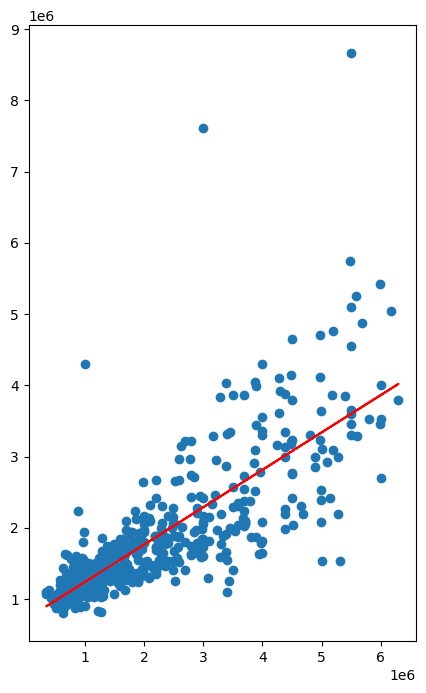

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

y_pred = model.predict(X_test_processed)
fig = plt.figure(figsize = (5, 8))
plt.scatter(x = y_test, y = y_pred)
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b, color='red')
plt.show()

# souce : https://data36.com/linear-regression-in-python-numpy-polyfit/

# Second Attempt

In [113]:
label = 'Price'
features = ["Quiet", "Bed","Bath","Sqft","Property Type"]
X = df[features]
y = df[label]

X.head()
y.head()

0     639900.0
1    2138000.0
2     975000.0
3    1799999.0
4     629800.0
Name: Price, dtype: float64

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

print("X_train:")
X_train.head()
print("y_train:")
y_train.head()

Initial amount of samples: #2790
Number of training samples: #2232
Number of test samples: #558
X_train:
y_train:


238      519000.0
1271    4990000.0
1448     588800.0
1718    3380000.0
100     2449000.0
Name: Price, dtype: float64

In [115]:
# select numeric features:
X_train_numeric = X_train._get_numeric_data().copy()

X_numeric_cols = X_train_numeric.columns
X_test_numeric  = X_test[X_numeric_cols].copy()

X_numeric_cols

Index(['Quiet', 'Bed', 'Bath', 'Sqft'], dtype='object')

In [116]:
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_numeric), columns=X_numeric_cols, index=X_train.index)
X_test_scaled  = pd.DataFrame(scaler.fit_transform(X_test_numeric), columns=X_numeric_cols, index=X_test.index)
X_train_scaled.head()

,Quiet,Bed,Bath,Sqft
238,0.8,0.153846,0.000000,0.075100
1271,0.8,0.461538,0.090909,0.237816
1448,0.4,0.076923,0.000000,0.017612
1718,1.0,0.384615,0.363636,0.307931
100,0.5,0.538462,0.363636,0.359880


In [117]:
X_discrete_4 = df[["Property Type"]]
X_discrete_encoded = pd.get_dummies(X_discrete_4, prefix_sep="__") 
X_train_discrete_encoded = X_discrete_encoded.loc[X_train.index,:]
X_test_discrete_encoded = X_discrete_encoded.loc[X_test.index,:]
X_train_discrete_encoded.head()

,Property Type__Condo,Property Type__Condo/Townhome,Property Type__MultiFamily,Property Type__Single Family,Property Type__Townhome
238,1,0,0,0,0
1271,0,0,0,1,0
1448,1,0,0,0,0
1718,0,0,0,1,0
100,0,0,0,1,0


In [118]:
X_train_processed = pd.concat((X_train_scaled, X_train_discrete_encoded), axis=1)
X_test_processed = pd.concat((X_test_scaled, X_test_discrete_encoded), axis=1)
X_test_processed


,Quiet,Bed,Bath,Sqft,Property Type__Condo,Property Type__Condo/Townhome,Property Type__MultiFamily,Property Type__Single Family,Property Type__Townhome
2247,0.2,0.363636,0.272727,0.118079,0,0,0,0,1
1518,0.6,0.181818,0.181818,0.102678,1,0,0,0,0
1468,0.4,0.272727,0.181818,0.100664,0,1,0,0,0
2498,0.3,0.727273,1.000000,0.397322,0,0,1,0,0
2121,0.9,0.181818,0.000000,0.042682,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
461,0.8,0.090909,0.000000,0.019529,1,0,0,0,0
1728,0.4,0.272727,0.090909,0.095631,1,0,0,0,0
157,0.3,0.272727,0.181818,0.094725,1,0,0,0,0
1662,0.5,0.727273,0.363636,0.292329,0,0,0,1,0


In [119]:
model = LinearRegression()
model.fit(X_train_processed, y_train)

LinearRegression()

In [120]:
def describe_output_for_model(model, X_test, y_test):
    
    print("Predicting...")
    print("\tdisplaying information re:")
    y_pred = model.predict(X_test)
   
    print("RMAE: ", mean_absolute_error(y_true=y_test, y_pred=y_pred)) #the lower the value the better 
    print("R^2 : ", r2_score(y_test, y_pred)) # closer to 1 but not 1, the better
    
        
    coef = list(sorted(zip(np.arange(X_test.shape[1]), abs(model.coef_)),key=lambda x: x[1]))
    coef_table = pd.DataFrame(np.array(coef).reshape(-1,2),columns=['Attributes','Coefficient'])
    print('\nCoefficient for every feature:\n')
    print(coef_table)

describe_output_for_model(model, X_test_processed, y_test)

Predicting...
	displaying information re:
RMAE:  559816.6630824372
R^2 :  0.6293384967023221

Coefficient for every feature:

   Attributes   Coefficient
0         0.0  1.274624e+05
1         2.0  9.722624e+05
2         1.0  1.368896e+06
3         3.0  7.899451e+06
4         7.0  5.243535e+19
5         4.0  5.243535e+19
6         5.0  5.243535e+19
7         8.0  5.243535e+19
8         6.0  5.243535e+19


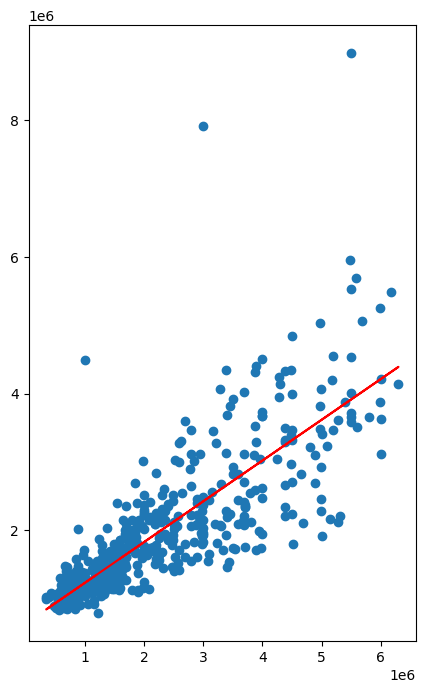

In [121]:
y_pred = model.predict(X_test_processed)
fig = plt.figure(figsize = (5, 8))
plt.scatter(x = y_test, y = y_pred)
m, b = np.polyfit(y_test, y_pred, 1)
plt.plot(y_test, m*y_test+b, color='red')
plt.show()

# souce : https://data36.com/linear-regression-in-python-numpy-polyfit/